<a href="https://colab.research.google.com/github/Rugiyya1/Hands-on-ML/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
#mnist is the dataset of images of digits handritten by students and people / 'Hello World' of ML dataset :))


In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
X.shape

(70000, 784)

In [8]:
#X=pd.DataFrame(X)
#X.head()

In [9]:
#y=pd.DataFrame(y)

In [10]:
y.shape

(70000,)

In [11]:
## there are 70000 images, eac image has 784 features(28x28 pixel images)

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt


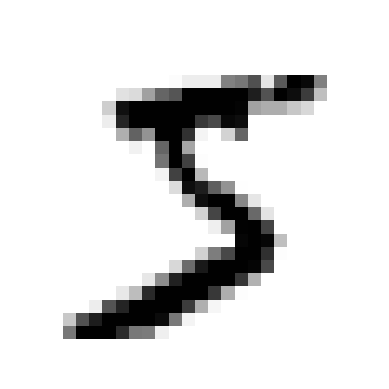

In [13]:
some_digit =X[0]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()


In [14]:
#picture looks like 5, let's check label
y[0]

'5'

In [15]:
## label is string, convert to int
y=y.astype(np.uint8)
y[0]

5

In [16]:
# MNIST dataset is already split into train and test set. training set is already shuffled

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Training a Binary Classifier

In [17]:
#to simplify the problem, trying to identify one digit (eg 5)

y_train_5 =(y_train==5)
y_test_5=(y_test==5)

In [18]:
## using Stochastic Gradient Descent (SGD) classiffier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
## the model predicted 5 correctly

## Performance Measures

In [21]:
## evaluating a classifier is often trickier than a regressor.


In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [23]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred =clone_clf.predict(X_test_fold)
  n_correct =sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))



0.9669
0.91625
0.96785


In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [25]:
## classifying every single image in the 'not-5' class

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self,X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)


In [26]:
never_5_clf =Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [27]:
## it shows that only 10% of images are 5s, (like imbalanced data)/ so accuracy is not best preffered measure for classifiers always

In [28]:
## Confusion Matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
## cross_val_predict performs K-fold cross-validation like cross_val_score(), but it returns
#predictions made on each test fold (instead of evaluation scores)

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

###Precision and Recall (PR) Curve

In [31]:
# Precision and recall

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [32]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [33]:
# above results shows that although your model is correct 83.7%, recall shows that it only detects 65% of 5s.
## recall and precision is combined into single metrics F1score. F1 is harmonic mean
#F1 will be high ii both recall and precision are high

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [34]:
#threshold cannot set directly, decition_function can help to set threshold

y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [35]:
threshold=0
y_some_digit_pred =(y_scores >threshold)
y_some_digit_pred

array([ True])

In [36]:
## increase threshold
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [37]:
## although our digit is 5, increasing threshold decreased recall, so our model didnt capture this 5

In [38]:
## how to decide which threshold to use
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                           method='decision_function')

In [39]:
#compute precisiona and recall for all possible thresholds (using precision_recall_curve())

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

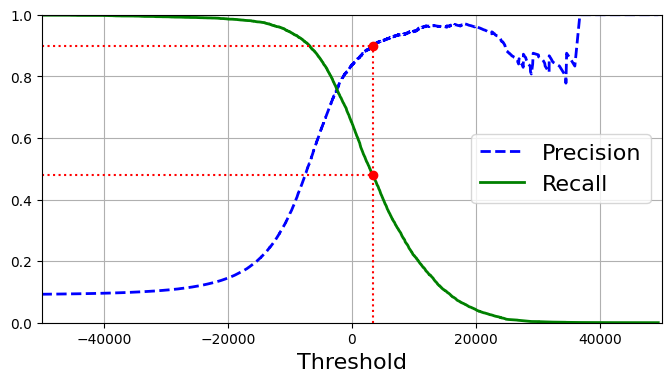

In [40]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='Precision',linewidth=2)
  plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
  plt.legend(loc="center right", fontsize=16) #
  plt.xlabel("Threshold", fontsize=16)        #
  plt.grid(True)                              #
  plt.axis([-50000, 50000, 0, 1])             #

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

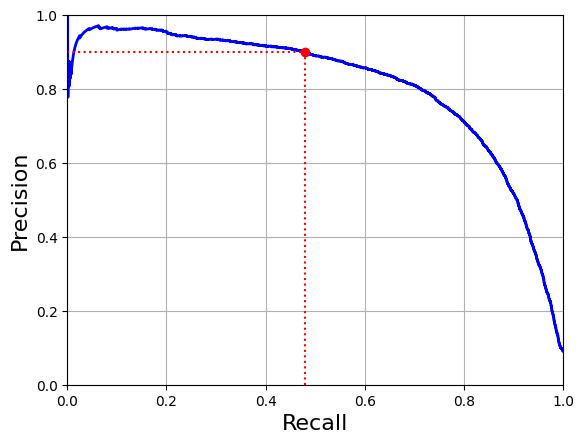

In [41]:
# another way to show precision/recall trade-off - direct plot

plt.plot(recalls , precisions, "b-", linewidth=2)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.grid(True)


In [42]:
#finding lowest threshold gives 90% precsions
threshold_90_precision=thresholds[np.argmax(precisions >= 0.9)]
threshold_90_precision

3370.0194991439557

In [43]:
## making predictions on the training set

y_train_pred_90 =(y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [44]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [45]:
## as it is shown, it is easy to get precision we want for classifiers, however, high precision is not useful if recall is low

###ROC curve

In [46]:
## Receiver Operating Curve - common tool for binary classifiers. Similar to precision/recall curve
## ROC plot recall (true positive rate) against false positive rate


In [47]:
from sklearn.metrics import roc_curve

In [48]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

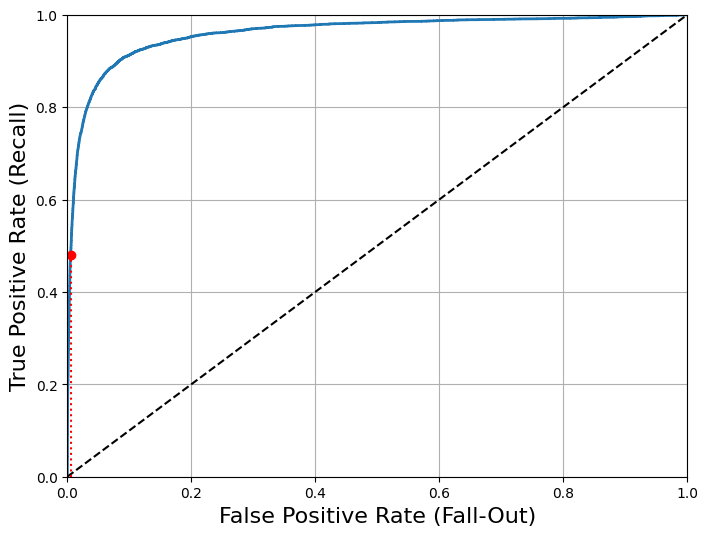

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)
  plt.grid(True)


plt.figure(figsize=(8, 6))                                    #
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           #
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   #
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  #
plt.plot([fpr_90], [recall_90_precision], "ro")               #
plt.show()

In [50]:
# one way to compare classififiers is to measure area under the curve (AUC)
#perfect classifier will have score equal to 1

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [51]:
#Comparing model using RandomForest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,
                                    method='predict_proba') # Random forest doenst have decision_function

In [52]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [53]:
#predcit_proba returns an array (1:probability, 0:probability)

y_scores_forest = y_probas_forest[:,1] #score=proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)



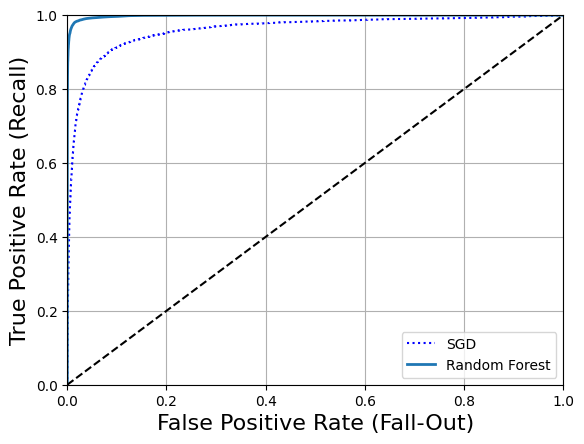

In [54]:
plt.plot(fpr,tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [55]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [56]:
y_train_pred_forest = y_probas_forest[:,1]>=0.5 #positive probaba >= 50% - default threshold
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [57]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

In [58]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

# Multiclass Classification

In [59]:
## two ways : OvA(one-versus-all) and OvO (one-versus-one)
# SVM works with OvO, others (randomforest, naivebayes) work well with OvA

In [60]:
from sklearn.svm import SVC

svm_clf=SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) ## SVM takes long time to run on large dataset
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [61]:
# Sckit-learn aumatically runs OvA (except for SVM)

sgd_clf.fit(X_train, y_train)

sgd_clf.predict([some_digit])


array([3], dtype=uint8)

In [62]:
## under the hood SGD trained 10 binary (0-9) classiffiers, got their decision scores for the image
## and selected the class with the highest score/ SGD wrong classified. but SVM right classified
## SVM runs  n*(n-1)/2 = 9*8/2 = 45 classifiers


In [63]:
# to check above point, lets call decision_function ()

some_digit_scores =svm_clf.decision_function([some_digit])
some_digit_scores # it returns 10 scores, one per class

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [64]:
#highest score is indeed corresponds to 5:
np.argmax(some_digit_scores)

5

In [65]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [66]:
# extra code – shows how to get all 45 OvO scores if needed
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[-0.16, -0.02,  0.04, -0.08, -0.95,  0.03, -0.17,  0.1 , -0.03,
         0.15,  0.2 ,  0.09, -0.79,  0.19, -0.01,  0.25,  0.14,  0.06,
        -0.06, -0.93,  0.05, -0.15,  0.12, -0.01, -0.11, -0.99, -0.01,
        -0.21,  0.06, -0.07, -0.88,  0.1 , -0.1 ,  0.17,  0.05,  0.98,
         0.79,  1.  ,  0.92, -0.2 ,  0.07, -0.06,  0.26,  0.15, -0.13]])

In [67]:
# another way to use classesdirectly

from sklearn.multiclass import OneVsOneClassifier ## OneVsRestClassiffier class can be used

ovo_clf =OneVsOneClassifier(SVC(gamma='auto', random_state=42))
ovo_clf.fit(X_train[:1000], y_train[:1000])
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [68]:
len(ovo_clf.estimators_)

45

In [ ]:
## tarining randomforest is direct and easy

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [ ]:
# model estimates that 90% probablity for image represents 5

In [ ]:
## then evaluating these classifiers - lets use sgd

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [ ]:
## just simply scaling the data increases accuracy a little bit

# Error analysis

In [ ]:
## analysing errors of the model

In [ ]:
# 1st way is to check confusion matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

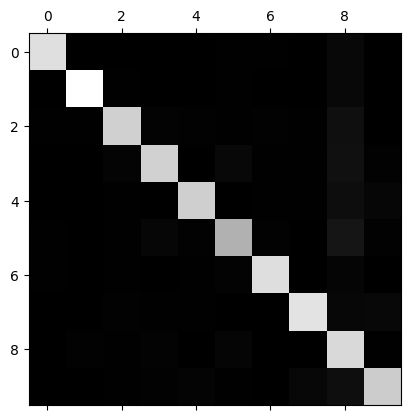

In [ ]:
## there are lots of numbers, better to look at image representation of confusion matrix

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

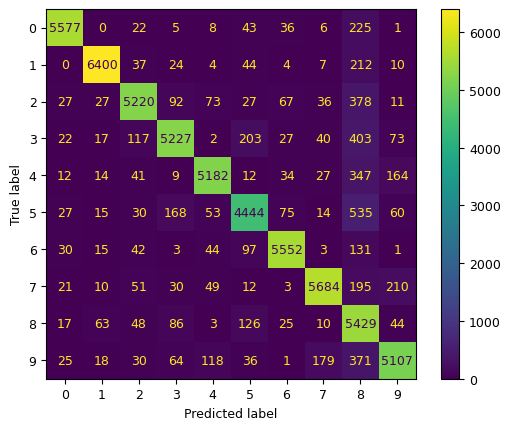

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

In [ ]:
# since most images are on diognal which means they are classiffied coreectlty
## 5 looks darker than others. maybe there are few data of 5 or classiffier doesnt perform as well on 5 as other digits, or could be both

In [ ]:
# lets focus on erros. divide each value in conf_mx by the number of images in the corressponding class

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

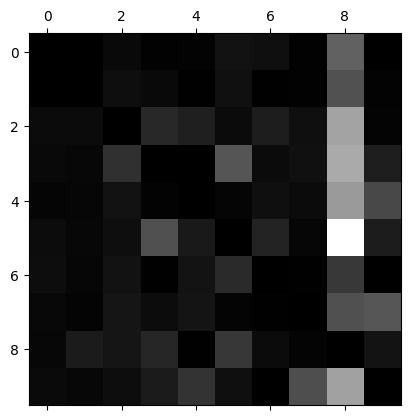

In [ ]:
# lets feel the diognal with zeros to keep errors only
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#rows represent actual classes, columns predicted ones.
## efforts should be on reducing false 8 classifying/ get more training data that looks like 8, but not 8
# classiffier confuses 3s and 5s

#Multilabel Classification

In [73]:
## multilabel example is face recognition. classifying 3 people in a picture

from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]
# this code creates y_multilabel array containing two target labels for each digit
# firts for if image low or higher than (7,8,9) and second  if image is odd or not

In [72]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [75]:
knn_clf = KNeighborsClassifier() # KN supports multilabel classification
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [76]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [77]:
# 5 is not large than 7 and it is odd

In [78]:
# evaluating multilabel classiffier (choosing right metric) depens on project
# one approach to measure F1 score for each label, and then compute avarege score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average ='macro')

0.976410265560605

In [79]:
# this assumes all labels are equally important, which may not be case.

In [80]:
# extra code – shows that we get a negligible performance improvement when we
#              set average="weighted" because the classes are already pretty
#              well balanced.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

# Multioutput Classififcation
multilabel classification where each class can be multiclass (may have more than two values)